In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
T = 50
R = 3
w = np.array([0.1, 0.2, 0.3, 0.3, 0.05, 0.05])

In [3]:
I = [1]

for t in range(1, T):
    s = min(len(I), len(w))
    lam = np.sum(I[t-s:t] * w[:s]) * R
    I += [np.random.poisson(lam)]
print(I)

[1, 2, 2, 4, 9, 8, 11, 14, 19, 31, 35, 44, 63, 87, 130, 167, 184, 325, 404, 544, 810, 1024, 1380, 1911, 2678, 3502, 4662, 6403, 8828, 11757, 16005, 21647, 29296, 40079, 53982, 73334, 99478, 134081, 182302, 247333, 334891, 454290, 615377, 832294, 1129826, 1533269, 2075552, 2809875, 3816679, 5171357]


<BarContainer object of 50 artists>

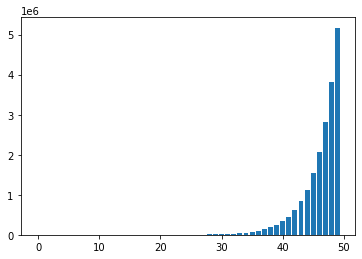

In [4]:
plt.bar(np.arange(len(I)), np.array(I))

In [5]:
tau = 10

prior_shape = 1.0
prior_scale = 1.0

In [6]:
def delta(I, w, t):
    s = min(len(I), len(w))
    return np.sum(I[t-s:t] * w[:s])

posterior_shape = prior_shape + np.sum(I[-tau:])
posterior_scale = 1.0 / (np.sum([delta(I, w, -t) for t in range(1, tau)]) + 1.0 / prior_scale)

print(posterior_shape)
print(posterior_scale)
print(posterior_shape * posterior_scale)

18773411.0
1.6271564602870907e-07
3.054727699027473
